https://www.cnblogs.com/shangfr/p/5736738.html

In [4]:
library(quantreg)
data(engel)

In [7]:
fit1 = rq(foodexp ~ income, tau = 0.5, data = engel)
r1 = resid(fit1)
c1 = coef(fit1)

In [10]:
summary(fit1)
summary(fit1, se = "boot")


Call: rq(formula = foodexp ~ income, tau = 0.5, data = engel)

tau: [1] 0.5

Coefficients:
            coefficients lower bd  upper bd 
(Intercept)  81.48225     53.25915 114.01156
income        0.56018      0.48702   0.60199


Call: rq(formula = foodexp ~ income, tau = 0.5, data = engel)

tau: [1] 0.5

Coefficients:
            Value    Std. Error t value  Pr(>|t|)
(Intercept) 81.48225 24.17362    3.37071  0.00088
income       0.56018  0.03255   17.21109  0.00000

In [11]:
fit1 = rq(foodexp ~ income, tau = 0.5, data = engel) 
fit2 = rq(foodexp ~ income, tau = 0.75, data = engel)

In [12]:
anova(fit1,fit2) 

Quantile Regression Analysis of Deviance Table

Model: foodexp ~ income
Joint Test of Equality of Slopes: tau in {  0.5 0.75  }

  Df Resid Df F value    Pr(>F)    
1  1      469  12.093 0.0005532 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

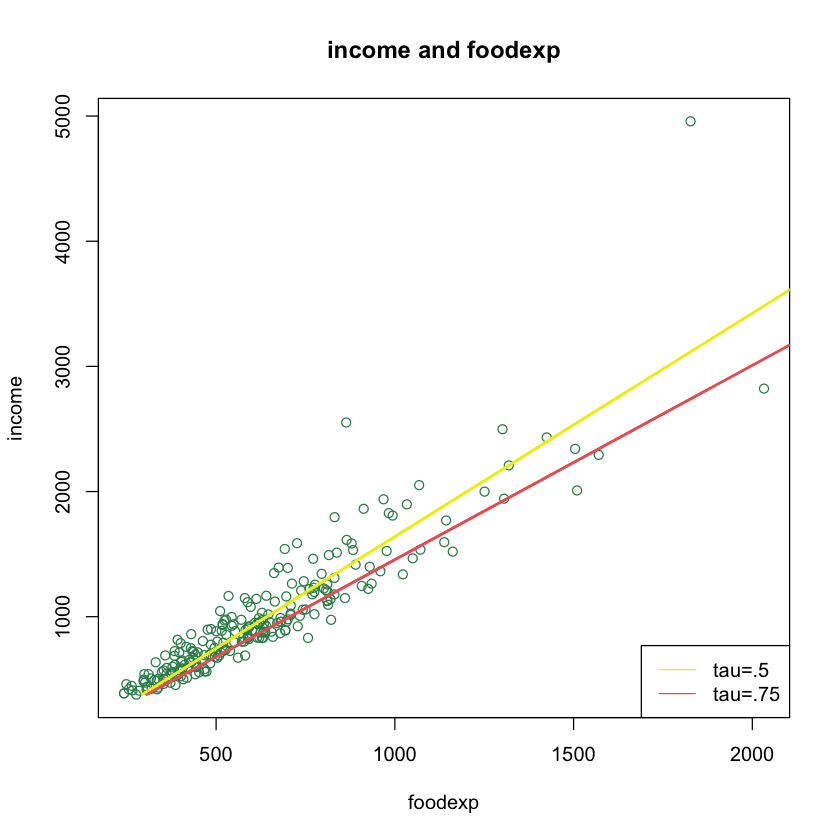

In [19]:
plot(engel$foodexp , engel$income,pch=1, col = "#2E8B57",
     main = "income and foodexp",xlab="foodexp",ylab="income")
lines(fitted(fit1), engel$income,lwd=2, col = "#EEEE00")
lines(fitted(fit2), engel$income,lwd=2, col = "#EE6363")
legend("bottomright", c("tau=.5","tau=.75"), lty=c(1,1),
       col=c("#EEEE00","#EE6363"))

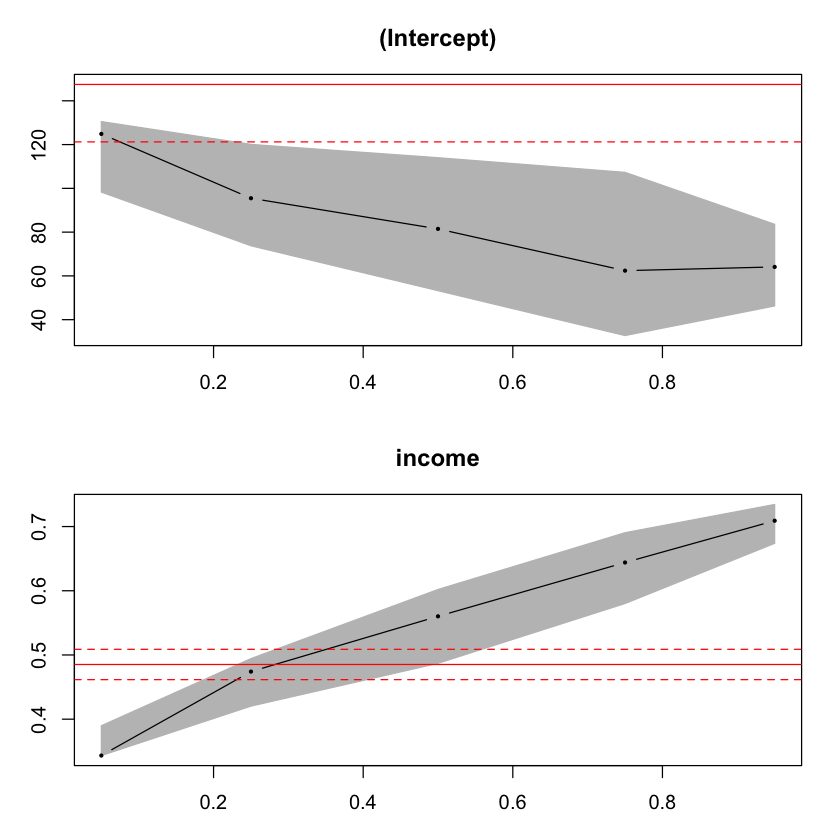

In [20]:
fit = rq(foodexp ~ income, tau = c(0.05,0.25,0.5,0.75,0.95), data = engel)
plot(summary(fit))

In [23]:
data(barro)
fit1 <- rq(y.net ~ lgdp2 + fse2 + gedy2 + Iy2 + gcony2, data = barro,tau=.25)
fit2 <- rq(y.net ~ lgdp2 + fse2 + gedy2 + Iy2 + gcony2, data = barro,tau=.50)
fit3 <- rq(y.net ~ lgdp2 + fse2 + gedy2 + Iy2 + gcony2, data = barro,tau=.75)

anova(fit1,fit2,fit3)
anova(fit1,fit2,fit3,joint=FALSE)

Warning message in summary.rq(x, se = se, covariance = TRUE):
“1 non-positive fis”

Quantile Regression Analysis of Deviance Table

Model: y.net ~ lgdp2 + fse2 + gedy2 + Iy2 + gcony2
Joint Test of Equality of Slopes: tau in {  0.25 0.5 0.75  }

  Df Resid Df F value  Pr(>F)  
1 10      473  1.8039 0.05751 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Warning message in summary.rq(x, se = se, covariance = TRUE):
“1 non-positive fis”

Quantile Regression Analysis of Deviance Table

Model: y.net ~ lgdp2 + fse2 + gedy2 + Iy2 + gcony2
Tests of Equality of Distinct Slopes: tau in {  0.25 0.5 0.75  }

       Df Resid Df F value  Pr(>F)  
lgdp2   2      481  1.0656 0.34535  
fse2    2      481  2.6398 0.07241 .
gedy2   2      481  0.7862 0.45614  
Iy2     2      481  0.0447 0.95632  
gcony2  2      481  0.0653 0.93675  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

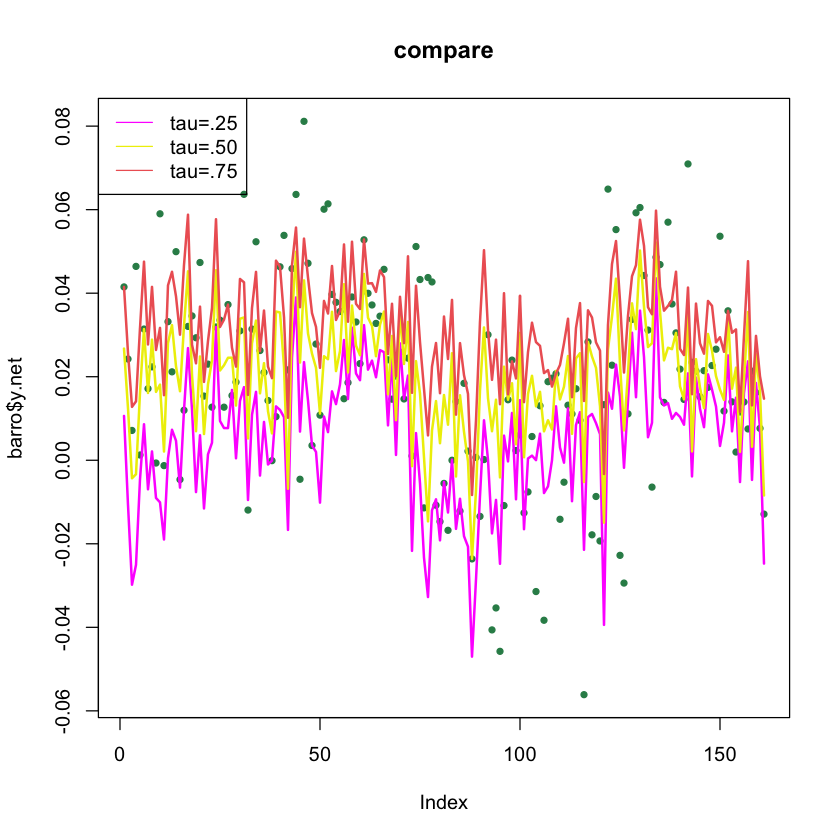

In [25]:
plot(barro$y.net,pch=20, col = "#2E8B57",
     main = "compare")
lines(fitted(fit1),lwd=2, col = "#FF00FF")
lines(fitted(fit2),lwd=2, col = "#EEEE00")
lines(fitted(fit3),lwd=2, col = "#EE6363")
legend("topleft", c("tau=.25","tau=.50","tau=.75"), lty=c(1,1),
       col=c( "#FF00FF","#EEEE00","#EE6363"))